<a href="https://colab.research.google.com/github/FiyonaK/Prediction-of-Product-Sales/blob/main/Project_1_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales
- Author: Fiyona Kriel

##Loading Data


In [27]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [28]:
#Use Pandas to read the sales prediction data set into Google Colab.
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

df_sales = pd.read_csv(fpath)

In [29]:
#Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
df_sales.info()

df_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Data Cleaning

In [30]:
#1) How many rows and columns?
df_sales.shape

(8523, 12)

8523 rows
12 columns

In [31]:
#2) What are the datatypes of each variable?
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Outlet Location Type and Outlet Identifier can be converted to numeric datatypes

In [32]:
#Converting Outlet_Identifier column to int
df_sales['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [33]:
df_sales['Outlet_Identifier'] = df_sales['Outlet_Identifier'].str.replace('OUT', '')
df_sales['Outlet_Identifier'].value_counts()

027    935
013    932
049    930
046    930
035    930
045    929
018    928
017    926
010    555
019    528
Name: Outlet_Identifier, dtype: int64

In [34]:
df_sales['Outlet_Identifier'] = df_sales['Outlet_Identifier'].astype(int)
df_sales['Outlet_Identifier'].dtypes

dtype('int64')

In [35]:
#Converting Outlet_Location_Type column to int
df_sales['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [36]:
df_sales['Outlet_Location_Type'] = df_sales['Outlet_Location_Type'].str.replace('Tier ', '')
df_sales['Outlet_Location_Type'].value_counts()

3    3350
2    2785
1    2388
Name: Outlet_Location_Type, dtype: int64

In [37]:
df_sales['Outlet_Location_Type'] = df_sales['Outlet_Location_Type'].astype(int)
df_sales['Outlet_Location_Type'].dtypes

dtype('int64')

In [38]:
#3) Are there duplicates? If so, drop any duplicates.
duplicated_rows = df_sales.duplicated()
duplicated_rows.sum()

0

There are no duplicate rows.

In [39]:
#4) Identify missing values.
missing_values = df_sales.isna().sum()
missing_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

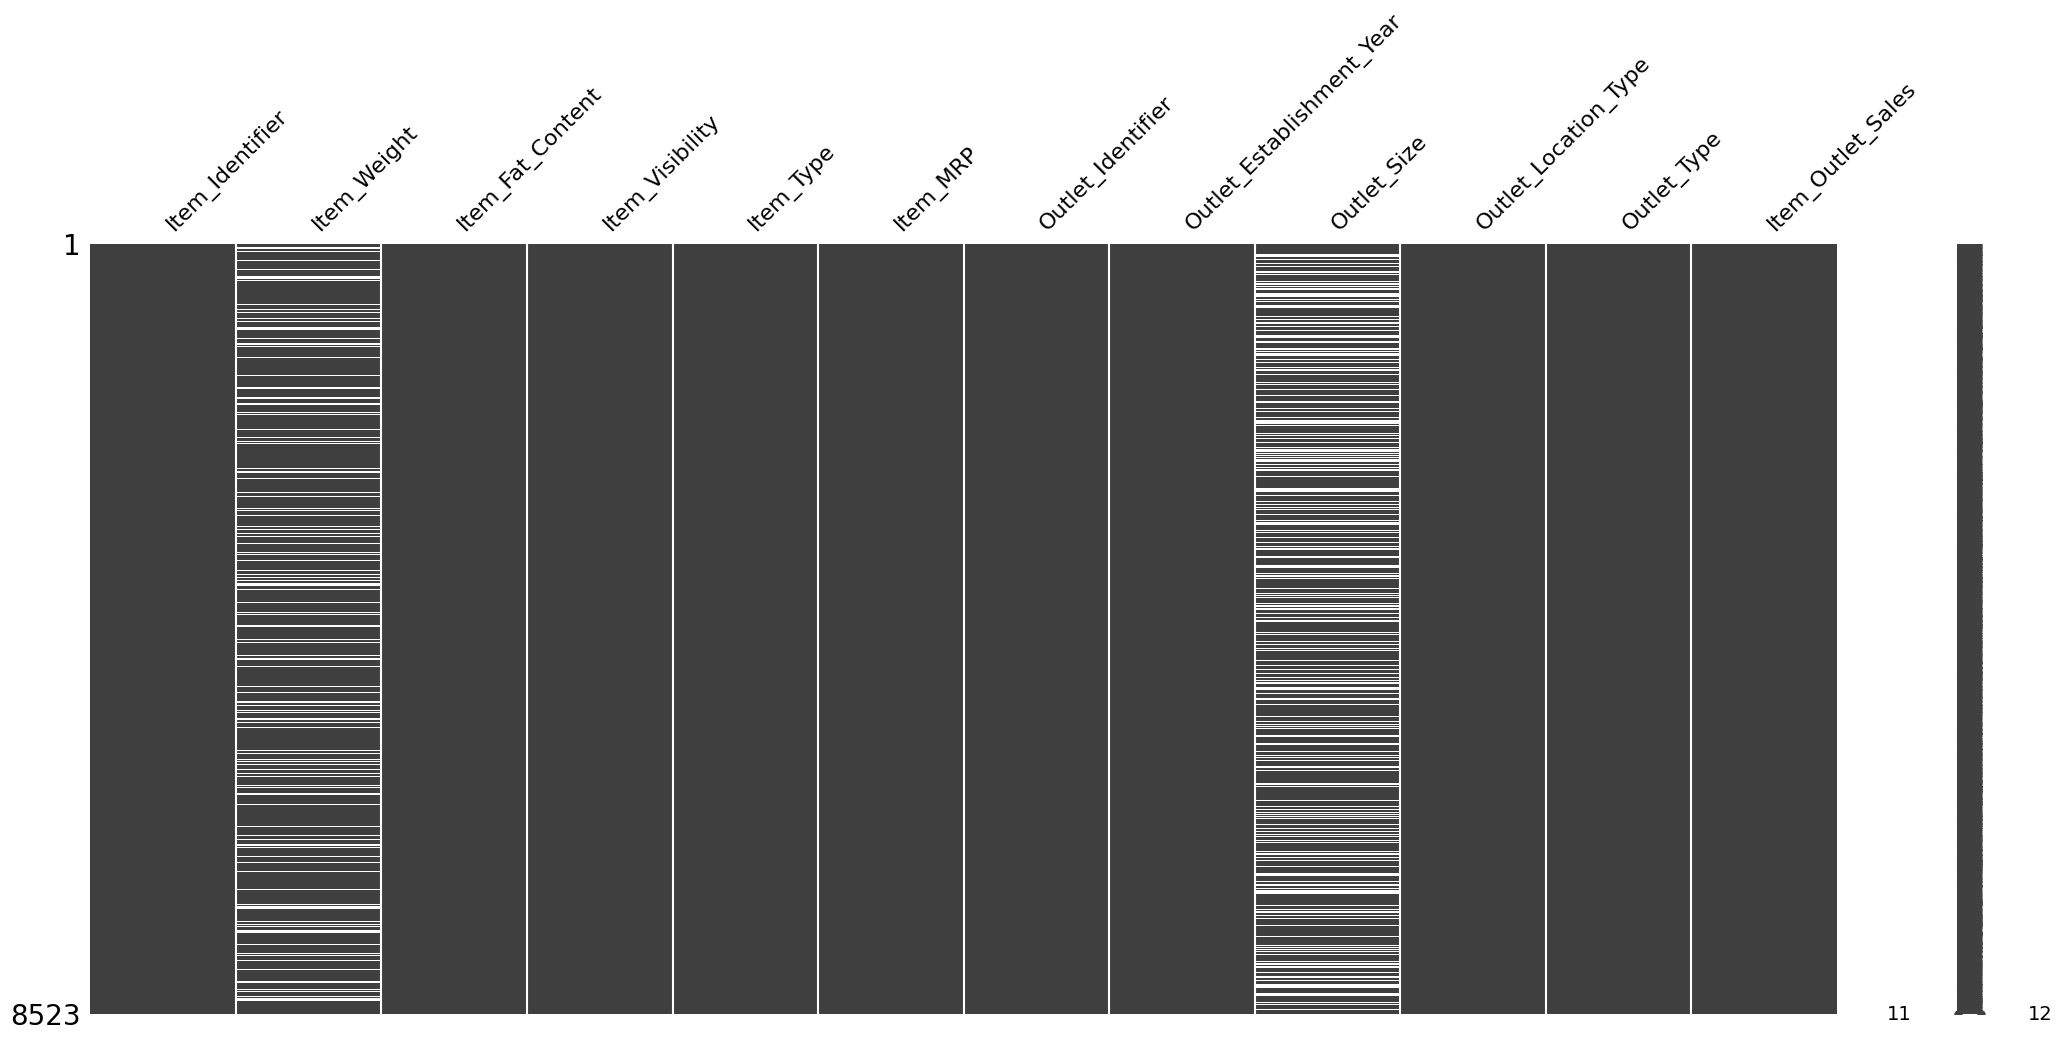

In [40]:
msno.matrix(df_sales);

In [41]:
#Address the missing values by using a placeholder value.
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)

df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna("MISSING")


In [42]:
#6) Confirm that there are no missing values after addressing them.
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [43]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
obj_columns = df_sales.select_dtypes('object').columns
obj_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size',
       'Outlet_Type'],
      dtype='object')

In [44]:
#Excluding Item_Identifier as that should be the indexing column
obj_columns = obj_columns[1:]
obj_columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Type'], dtype='object')

In [45]:
df_sales[obj_columns].nunique()

Item_Fat_Content     5
Item_Type           16
Outlet_Size          4
Outlet_Type          4
dtype: int64

In [46]:
#Check value counts and correct inconsistencies
# loop through the list of string columns
for i in obj_columns:
  # print the value counts for the column
  print(f"{i}:")
  print(df_sales[i].value_counts())
  # Print an empty line for readability
  print ('\n')

Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Size:
Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


Outlet_Type:
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64




Based on the info above, Item_Fat_Content is the only feature/column with data inconsistencies

In [47]:
#Correcting data inconsistencies in Item_Fat_Content column
rep_vals = {"LF": "Low Fat", "reg" : "Regular", "low fat" : "Low Fat"}
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace(rep_vals)
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [48]:
num_cols = num_columns = df_sales.select_dtypes('number').columns
num_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [49]:
df_sales['Item_Weight'].describe()

count    8523.000000
mean       10.478936
std         6.720742
min        -1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [50]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
for i in num_cols:
  print(f"{i}:")
  print(df_sales[i].describe().loc[['min', 'max', 'mean']])
  print ('\n')

Item_Weight:
min     -1.000000
max     21.350000
mean    10.478936
Name: Item_Weight, dtype: float64


Item_Visibility:
min     0.000000
max     0.328391
mean    0.066132
Name: Item_Visibility, dtype: float64


Item_MRP:
min      31.290000
max     266.888400
mean    140.992782
Name: Item_MRP, dtype: float64


Outlet_Identifier:
min     10.000000
max     49.000000
mean    29.108765
Name: Outlet_Identifier, dtype: float64


Outlet_Establishment_Year:
min     1985.000000
max     2009.000000
mean    1997.831867
Name: Outlet_Establishment_Year, dtype: float64


Outlet_Location_Type:
min     1.000000
max     3.000000
mean    2.112871
Name: Outlet_Location_Type, dtype: float64


Item_Outlet_Sales:
min        33.290000
max     13086.964800
mean     2181.288914
Name: Item_Outlet_Sales, dtype: float64




##Exploratory Data Analysis

In [59]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

1. Histograms to view the distributions of numerical features in your dataset

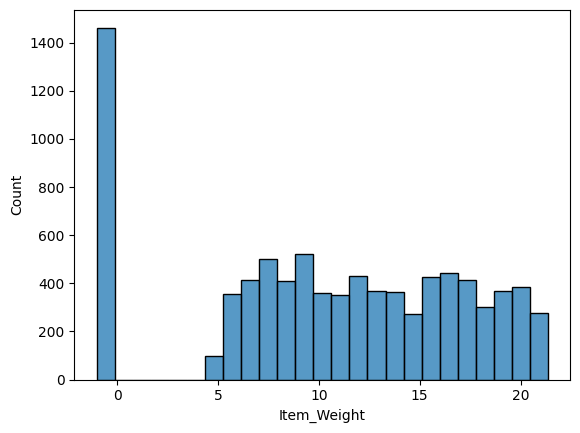

In [64]:
ax = sns.histplot(data=df_sales, x='Item_Weight')

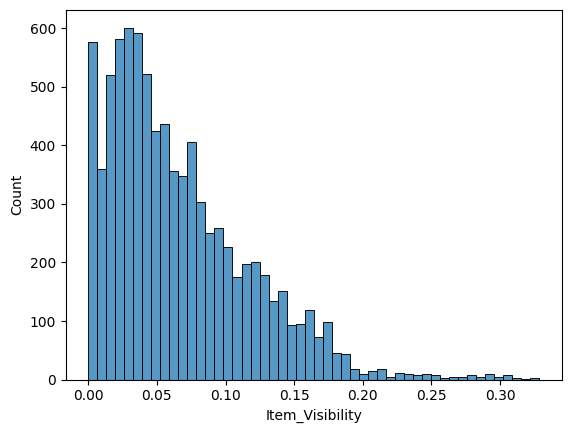

In [65]:
ax = sns.histplot(data=df_sales, x='Item_Visibility')

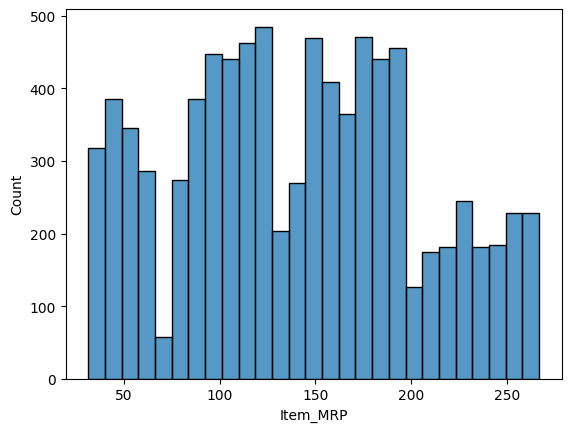

In [66]:
ax = sns.histplot(data=df_sales, x='Item_MRP')

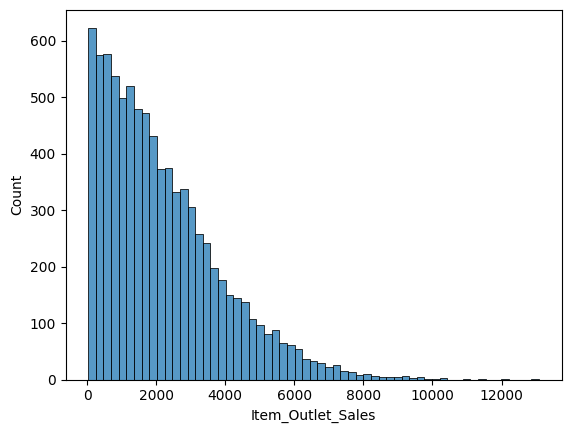

In [67]:
ax = sns.histplot(data=df_sales, x='Item_Outlet_Sales')

2. Boxplots to view statistical summaries of numerical features in your dataset.

In [71]:
sales_stats = df_sales.describe()
sales_stats

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,29.108765,1997.831867,2.112871,2181.288914
std,6.720742,0.051598,62.275067,13.927648,8.371760,0.812757,1706.499616
min,-1.000000,0.000000,31.290000,10.000000,1985.000000,1.000000,33.290000
25%,6.650000,0.026989,93.826500,17.000000,1987.000000,1.000000,834.247400
50%,11.000000,0.053931,143.012800,27.000000,1999.000000,2.000000,1794.331000
75%,16.000000,0.094585,185.643700,45.000000,2004.000000,3.000000,3101.296400
max,21.350000,0.328391,266.888400,49.000000,2009.000000,3.000000,13086.964800


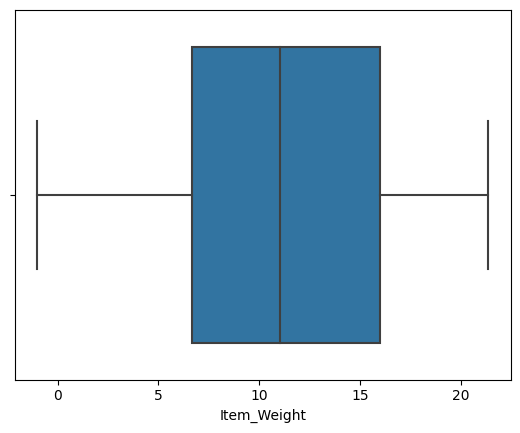

In [73]:
ax = sns.boxplot(data=df_sales, x='Item_Weight')

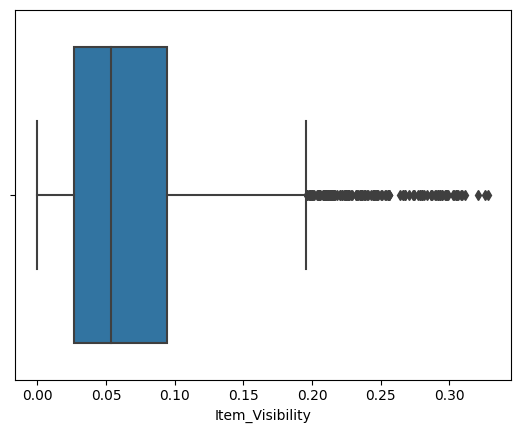

In [74]:
ax = sns.boxplot(data=df_sales, x='Item_Visibility')

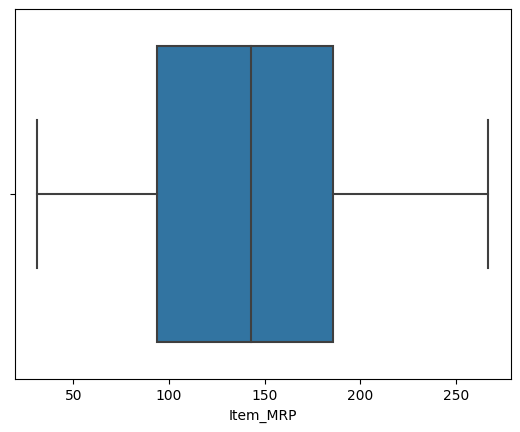

In [75]:
ax = sns.boxplot(data=df_sales, x='Item_MRP')

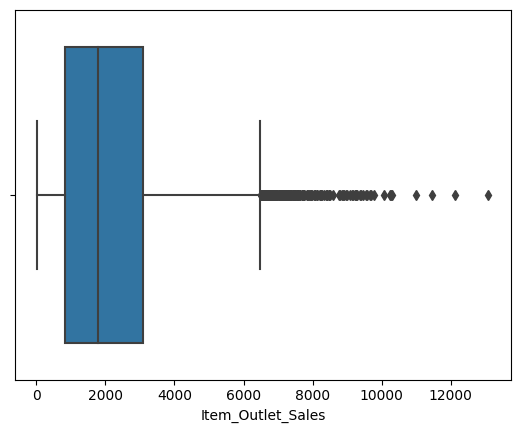

In [76]:
ax = sns.boxplot(data=df_sales, x='Item_Outlet_Sales')

3. Countplots to view the frequency of each class of categorial features in your dataset.

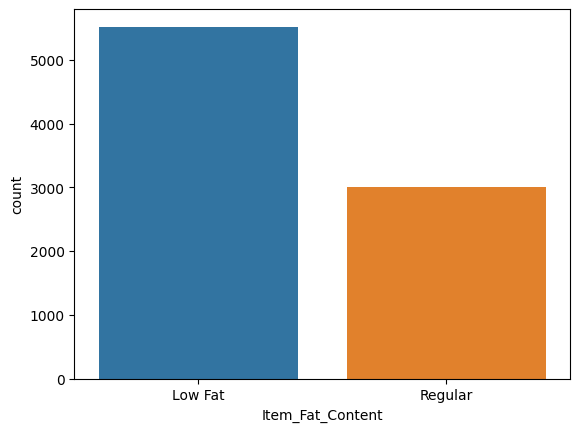

In [80]:
ax = sns.countplot(data=df_sales, x='Item_Fat_Content')

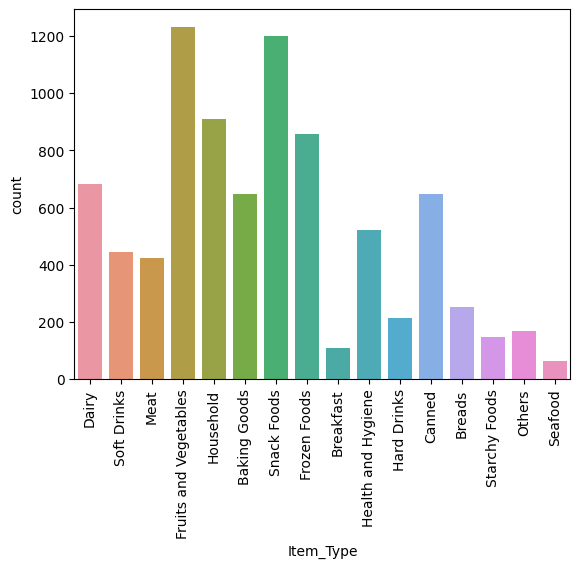

In [86]:
ax = sns.countplot(data=df_sales, x='Item_Type')
plt.setp(ax.get_xticklabels(), rotation=90);

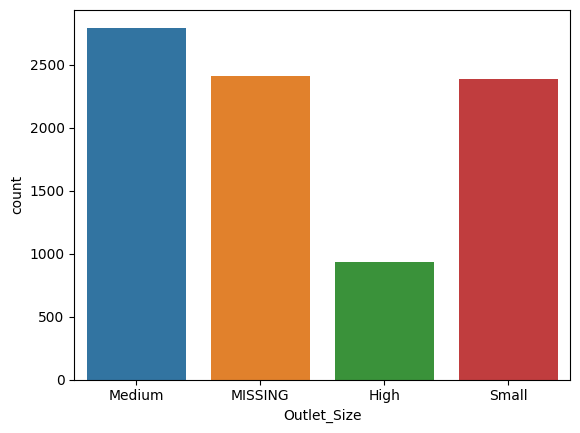

In [91]:
ax = sns.countplot(data=df_sales, x='Outlet_Size')

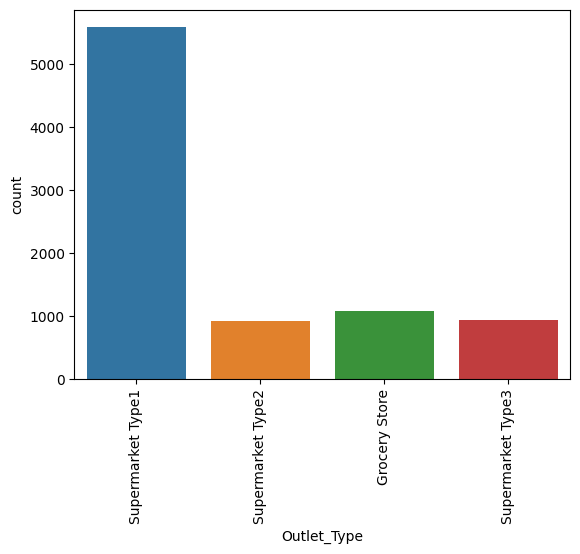

In [93]:
ax = sns.countplot(data=df_sales, x='Outlet_Type')
plt.setp(ax.get_xticklabels(), rotation=90);

4. Heatmap to view the correlation between features.

In [95]:
corr = df_sales.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.12,0.54,-0.07,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.11,-0.07,-0.03,-0.13
Item_MRP,0.02,-0.00,1.00,0.00,0.01,0.00,0.57
Outlet_Identifier,0.12,-0.11,0.00,1.00,0.14,-0.69,0.15
Outlet_Establishment_Year,0.54,-0.07,0.01,0.14,1.00,-0.09,-0.05
Outlet_Location_Type,-0.07,-0.03,0.00,-0.69,-0.09,1.00,0.09
Item_Outlet_Sales,-0.06,-0.13,0.57,0.15,-0.05,0.09,1.00


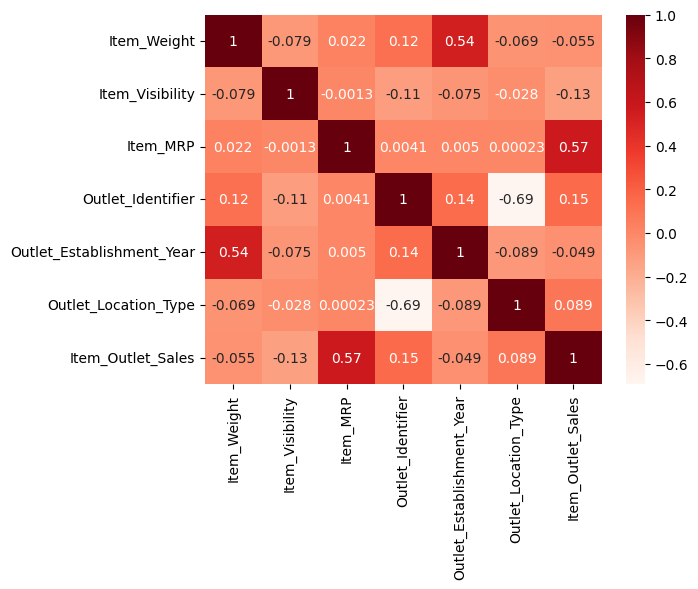

In [98]:
ax = sns.heatmap(corr, cmap = 'Reds', annot = True)